In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("credit_score.csv")

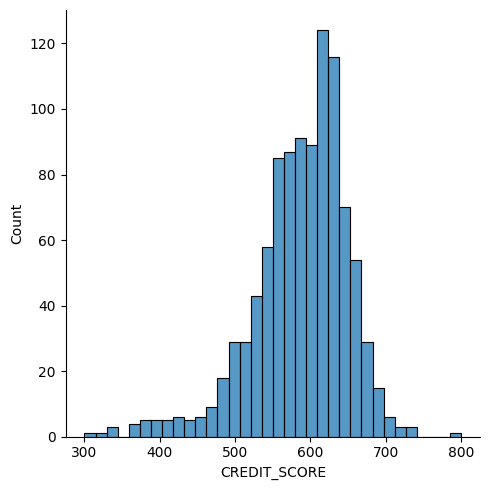

In [3]:
sns.displot(df["CREDIT_SCORE"])

Text(0, 0.5, 'Credit Score')

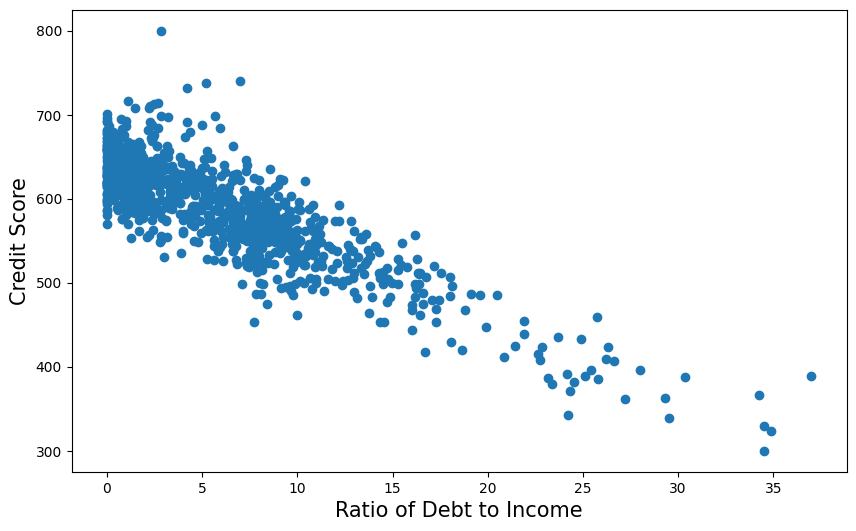

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(df['R_DEBT_INCOME'], df['CREDIT_SCORE'])
plt.xlabel("Ratio of Debt to Income", size=15)
plt.ylabel("Credit Score", size=15)

### Train Linear Model

In [5]:
#select features and target
X = df[['INCOME', 'R_DEBT_INCOME']]
Y = df['CREDIT_SCORE']

#fit regression model
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1457.
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          1.38e-296
Time:                        14:58:02   Log-Likelihood:                -4884.8
No. Observations:                1000   AIC:                             9776.
Df Residuals:                     997   BIC:                             9790.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           637.1808      1.775    359.032

### Summary
Credit score start with a base credit score of 637. This score will increase by 5.315e-05 for every 1 unit increase in income, decrease by 9.3816 for every 1 unit increase in R_DEBT_INCOME.

In [6]:
df['R_ENTERTAINMENT']

0      0.5065
1      0.5042
2      0.6178
3      0.5094
4      0.5150
        ...  
995    0.5038
996    0.6379
997    0.6163
998    0.5105
999    0.5076
Name: R_ENTERTAINMENT, Length: 1000, dtype: float64

In [7]:
# X['R_ENTERTAINMENT_INV'] =  df['T_ENTERTAINMENT_6'] / df['T_ENTERTAINMENT_12']
# X['R_ENTERTAINMENT_INV'] = X['R_ENTERTAINMENT_INV'].fillna(X['R_ENTERTAINMENT_INV'].mean())

X = df[['INCOME', 'R_DEBT_INCOME','R_ENTERTAINMENT']]
Y = df['CREDIT_SCORE']

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1052.
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          3.84e-308
Time:                        14:58:02   Log-Likelihood:                -4854.3
No. Observations:                1000   AIC:                             9717.
Df Residuals:                     996   BIC:                             9736.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             704.8321      8.718     

If a customer has spent a large amount on entertainment in the last 6 months relative to last 12 months, they will have a lower credit score

In [8]:
X = df[['INCOME', 'R_DEBT_INCOME', 'R_ENTERTAINMENT', 'R_EXPENDITURE']]
X['R_EXPENDITURE_SQR'] = df["R_EXPENDITURE"] ** 2
Y = df['CREDIT_SCORE']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     797.7
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:58:02   Log-Likelihood:                -4762.2
No. Observations:                1000   AIC:                             9536.
Df Residuals:                     994   BIC:                             9566.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               695.3761     22.93

/tmp/ipykernel_20822/2646807948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['R_EXPENDITURE_SQR'] = df["R_EXPENDITURE"] ** 2


<Axes: xlabel='T_GAMBLING_12', ylabel='Count'>

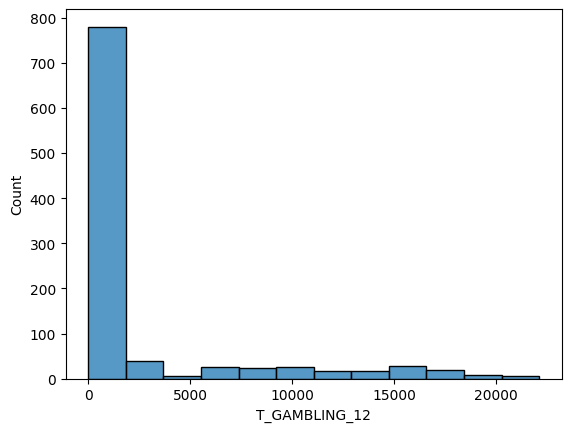

In [9]:
sns.histplot(df['T_GAMBLING_12'],bins=12)

In [10]:
#one-hot encoding of categorical variable
X = df[['INCOME', 'R_DEBT_INCOME', 'R_ENTERTAINMENT', 'R_EXPENDITURE']]
X['R_EXPENDITURE_SQR'] = df["R_EXPENDITURE"] ** 2

X['GAMBLING_LOW'] = df['CAT_GAMBLING'].apply(lambda x: 1 if x == 'Low' else 0)
X['GAMBLING_HIGH'] = df['CAT_GAMBLING'].apply(lambda x: 1 if x == 'High' else 0)

y = df['CREDIT_SCORE']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     672.1
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:58:02   Log-Likelihood:                -4694.1
No. Observations:                1000   AIC:                             9404.
Df Residuals:                     992   BIC:                             9444.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               674.9545     21.51

/tmp/ipykernel_20822/482152046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['R_EXPENDITURE_SQR'] = df["R_EXPENDITURE"] ** 2
/tmp/ipykernel_20822/482152046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GAMBLING_LOW'] = df['CAT_GAMBLING'].apply(lambda x: 1 if x == 'Low' else 0)
/tmp/ipykernel_20822/482152046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

<Axes: xlabel='INCOME', ylabel='DEBT'>

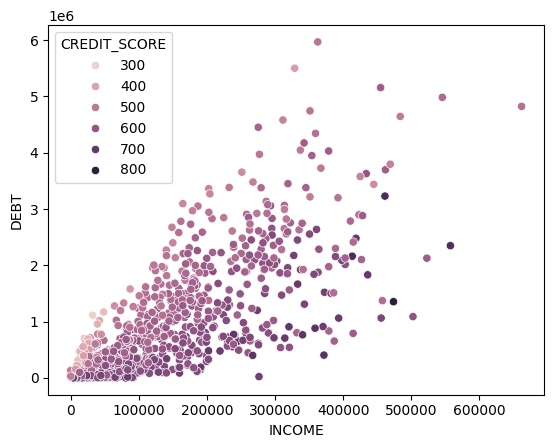

In [11]:
sns.scatterplot(df, x="INCOME", y="DEBT", hue="CREDIT_SCORE")

In [12]:
X = df[['INCOME', 'DEBT']]
Y = df['CREDIT_SCORE']
X['INCOME.DEBT'] = X['INCOME'] * X['DEBT']


X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     173.1
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           2.48e-90
Time:                        14:58:03   Log-Likelihood:                -5358.3
No. Observations:                1000   AIC:                         1.072e+04
Df Residuals:                     996   BIC:                         1.074e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         590.1795      2.768    213.251      

/tmp/ipykernel_20822/2170644853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['INCOME.DEBT'] = X['INCOME'] * X['DEBT']


In [13]:
#one-hot encoding of categorical variable
X = df[['INCOME', 'DEBT','R_DEBT_INCOME', 'R_ENTERTAINMENT', 'R_EXPENDITURE']]
X['INCOME.DEBT'] = X['INCOME'] * X['DEBT']

X['R_EXPENDITURE_SQR'] = df["R_EXPENDITURE"] ** 2

X['GAMBLING_LOW'] = df['CAT_GAMBLING'].apply(lambda x: 1 if x == 'Low' else 0)
X['GAMBLING_HIGH'] = df['CAT_GAMBLING'].apply(lambda x: 1 if x == 'High' else 0)

y = df['CREDIT_SCORE']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     536.2
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:15:50   Log-Likelihood:                -4682.8
No. Observations:                1000   AIC:                             9386.
Df Residuals:                     990   BIC:                             9435.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               676.1967     21.33

/tmp/ipykernel_20822/663589736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['INCOME.DEBT'] = X['INCOME'] * X['DEBT']
/tmp/ipykernel_20822/663589736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['R_EXPENDITURE_SQR'] = df["R_EXPENDITURE"] ** 2
/tmp/ipykernel_20822/663589736.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan